# Exercice 2: Miles Per Gallon


1. Quelles sont les variables discrètes et continues de ce dataset ?
2. Analysez la variable mpg.
- Quelle est la moyenne ? Que représente-t'elle vraiment ? (soyez clair et précis !)
- Tracez les 2 graphiques utiles pour cette variable
3. Analysez la variable "cylinders"
4. Analysez la variable "origin"
5. Observez l'évolution de la consommation des voitures (mpg) par rapport au nombre de chevaux (horsepower)
- Que semble-t-on voir ?
- Rajoutez-y la variable de l'année du modèle. Que voit-on ?
6. Observez l'évolution du poids moyen des voitures américaines de l'année 70 jusqu'à l'année 82.
- Que semble-t-on voir ?
- Voit-on également cela pour les autres pays ?
7. Analysez la relation entre le nombre de cylindres et l'année du modèle.
- Se dégage-t'il quelque chose de cette analyse ?
8. Analysez la relation entre le nombre de cylindres et l'origine.
- Se dégage-t'il quelque chose de cette analyse ?
9. Quelle est l'accélération moyenne des voitures des différents pays ?
10. Quelle est-elle pour les modèles de l'année 80 ?
11. Au final Il semblerait qu'une tendance se dégage à travers le temps...
- faites la liste de tous les phénomènes qui semblent se produire (diminution ? augmentation ?) pour les différentes variables et groupes




In [1]:
# importer les librairies necessaire
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
print("seaborn versionr: ", sns.__version__)
print("pandas version :" ,pd.__version__)
print("matplotlib.pyplot version " ,matplotlib.__version__)

seaborn versionr:  0.13.2
pandas version : 2.2.2
matplotlib.pyplot version  3.9.2


In [2]:
#importation du dataset
df_0= sns.load_dataset("mpg")

#suprimer les lignes avec  valeur non
df_0.dropna(inplace=True)
df=df_0.copy()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### TOUR D'HORIZON DU DATASET


In [3]:
df.info() #info generale sur le dataset

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [4]:
df.nunique() #le nombre de valeur prises par chaque colonne

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model_year       13
origin            3
name            301
dtype: int64

1. Quelles sont les variables discrètes et continues de ce dataset ?

In [5]:
print("les variables discretes sont : cylinders , model_year, origin , name \nles variables contiues sont : mpg , acceleration , displacement , horspower , weight ")

les variables discretes sont : cylinders , model_year, origin , name 
les variables contiues sont : mpg , acceleration , displacement , horspower , weight 


2. Analysez la variable mpg.
- Quelle est la moyenne ? Que représente-t'elle vraiment ? (soyez clair et précis !)
- Tracez les 2 graphiques utiles pour cette variable

In [6]:
df["mpg"].describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

- la consommation moyenne des voitures americaines,europeennes et japonaises de 1970-1982 est de 23,,5 mpg, dans ce jeu de données. (source?)
- avec un ecart-types
- la consommation la plus elevée est de 9 mpg
- la consommation la plus faible est de 46,6 mpg

In [7]:

df.query("  `mpg` == 46.6 ")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc


la moyenne de mpg est : 23.445918367346938 
cela signifie qu'en moyen la mpg des voitures presentes dans mon dataset est : 23.445918367346938


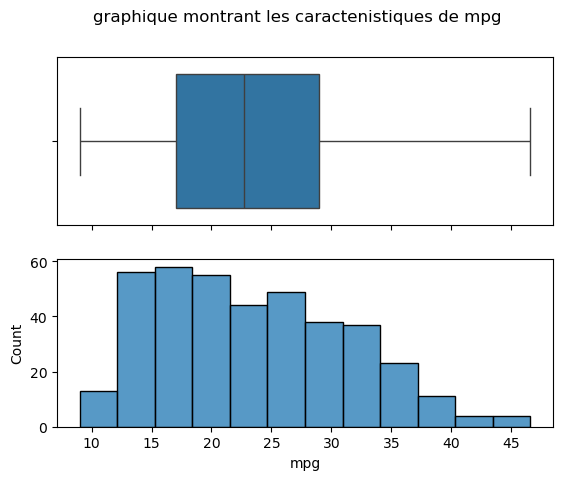

In [8]:
#mpg est une variable continues
mpg_mean=df["mpg"].mean()
print("la moyenne de mpg est : {} \ncela signifie qu'en moyen la mpg des voitures presentes dans mon dataset est : {}".format(mpg_mean,mpg_mean) )

fig,ax= plt.subplots(2,1,sharex=True)
plt.suptitle("graphique montrant les caractenistiques de mpg")
sns.boxplot(data=df,x="mpg",ax=ax[0])
sns.histplot(data=df,x="mpg",ax=ax[1])
plt.show()

3. Analysez la variable "cylinders"

cylinders
3     1.0
4    51.0
5     1.0
6    21.0
8    26.0
Name: proportion, dtype: float64


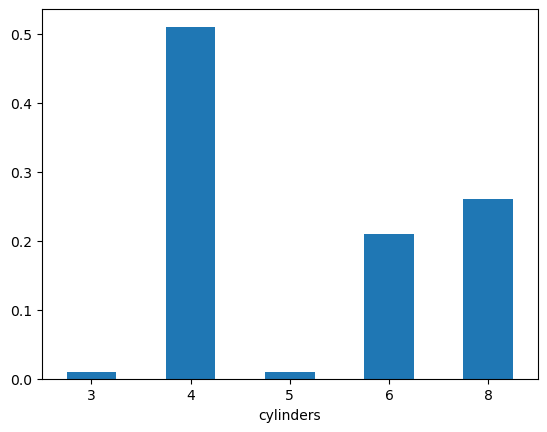

In [9]:
#vcylinder est une variables discretes
cylinders_counts= df["cylinders"].value_counts(normalize=True).round(2).sort_index()
print(cylinders_counts*100)
cylinders_counts.plot(kind="bar",rot=0)
plt.show()


4. Analysez la variable "origin"

origin
europe     68
japan      79
usa       245
Name: count, dtype: int64


Text(0.5, 1.0, 'graphique du nombre de voiture par pays')

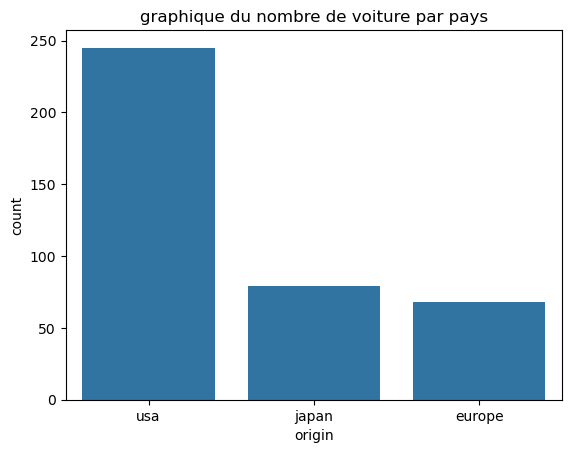

In [10]:
#origin est une variable discrete 
origin_count=df["origin"].value_counts().sort_values()
print(origin_count)

sns.countplot(data=df, x="origin")
plt.title("graphique du nombre de voiture par pays")

5. Observez l'évolution de la consommation des voitures (mpg) par rapport au nombre de chevaux (horsepower)
- Que semble-t-on voir ?
- Rajoutez-y la variable de l'année du modèle. Que voit-on ?

Text(0.5, 1.0, 'graphique du nombre de chevaux en fonction de la consommation de carburant')

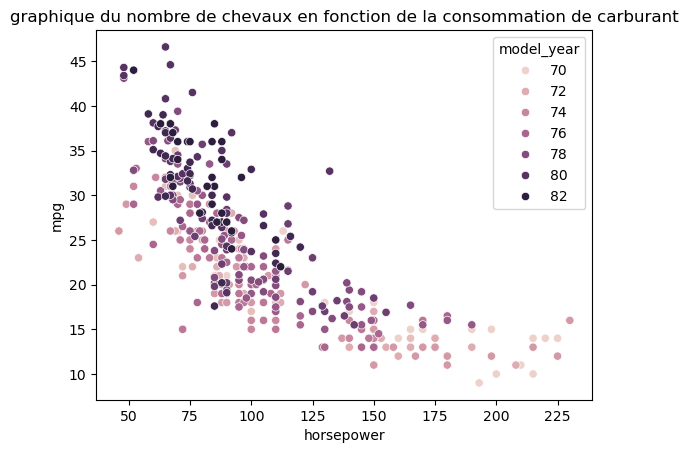

In [11]:
#analyse consommmation de voiture (mpg) varible discrete - chevaux(horsepower) variable continue
#sns.catplot(data=df , y="mpg" ,x="horsepower" , kind="bar")  
sns.scatterplot( data=df , y="mpg" ,x="horsepower",hue="model_year")  
#hue permet d'afficher la tendance en fonctiond'une colonne
plt.title("graphique du nombre de chevaux en fonction de la consommation de carburant")

6. Observez l'évolution du poids moyen des voitures américaines de l'année 70 jusqu'à l'année 82.
- Que semble-t-on voir ?
- Voit-on également cela pour les autres pays ?

<function matplotlib.pyplot.show(close=None, block=None)>

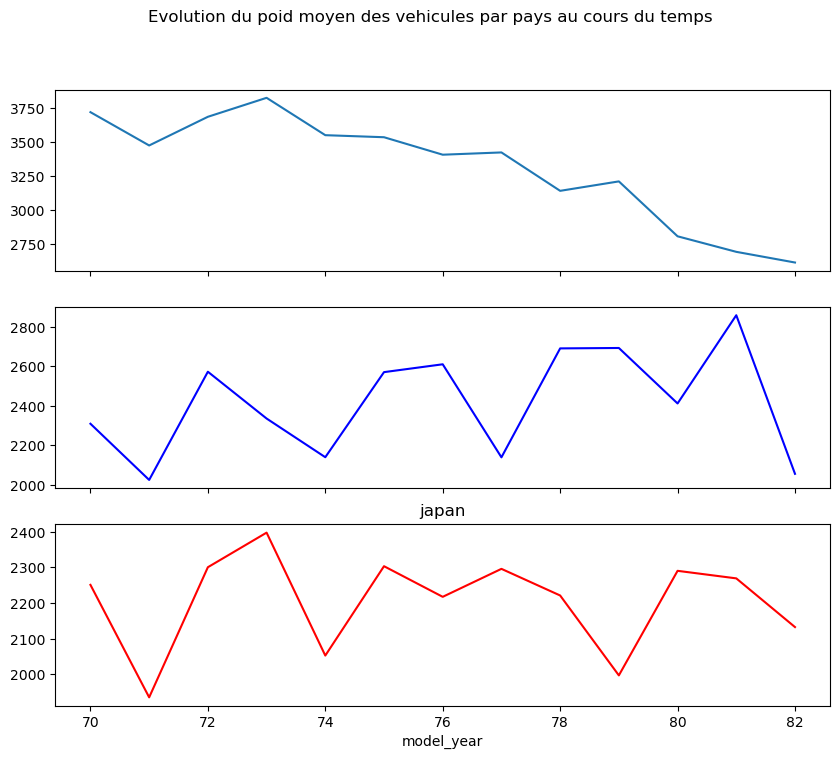

In [12]:
#analyse du poid en fonction des années donc (continue-discrete)

df_usa= df.query("origin in ['usa',]").groupby("model_year")["weight"].mean()
#df.query("origin in ['usa',]").groupby("model_year")["weight"].mean().plot(color="black", ax=ax[0])
fig,ax= plt.subplots(3,1,sharex=True,figsize=(10,8))
plt.suptitle("Evolution du poid moyen des vehicules par pays au cours du temps")
df_usa.plot(ax=ax[0])
plt.title("usa")
df.query("origin in ['europe',]").groupby("model_year")["weight"].mean().plot(color="blue", ax=ax[1])
plt.title("europe")
df.query("origin in ['japan',]").groupby("model_year")["weight"].mean().plot(color="red", ax=ax[2])
plt.title("japan")
plt.show

#sns.catplot(data=df.query("origin in ['usa',]" ),y="weight",x="model_year",kind="box",)

correction de guillaume

<Axes: xlabel='model_year', ylabel='weight'>

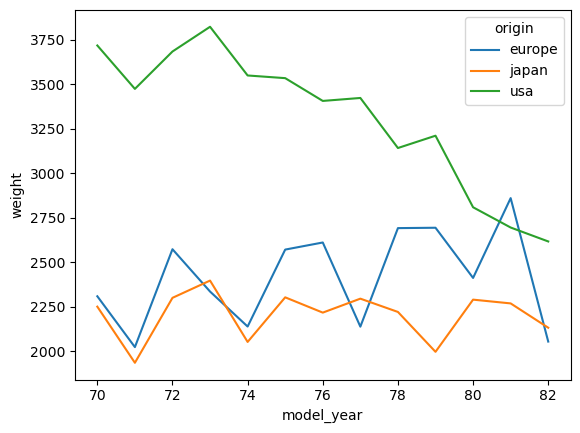

In [13]:
data_plot= df.groupby([ "origin" ,"model_year" ])["weight"].mean().reset_index()
#data_plot
sns.lineplot(data=data_plot , x="model_year" ,y="weight",hue="origin")

7. Analysez la relation entre le nombre de cylindres et l'année du modèle.
- Se dégage-t'il quelque chose de cette analyse ?

correction guillaume

Text(0.5, 1.0, 'proportiton des cylinders a travers les années')

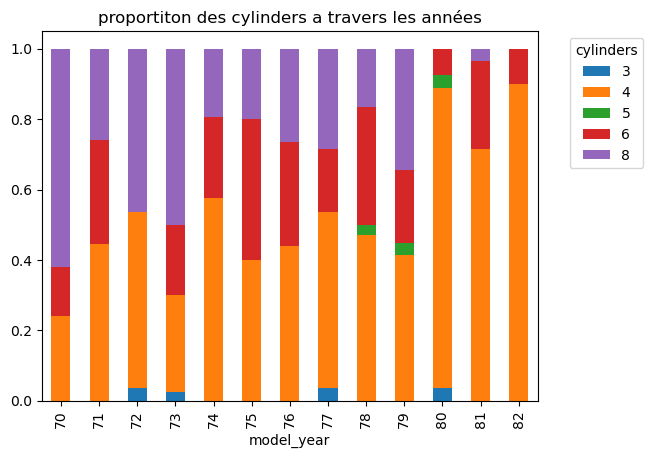

In [14]:
crosstab= pd.crosstab(df["cylinders"],df["model_year"])
crosstab= pd.crosstab(df["model_year"],df["cylinders"],normalize="index").plot(kind="bar",stacked=True)
plt.legend(title="cylinders" , bbox_to_anchor=(1.05,1) ,loc="upper left")
plt.title("proportiton des cylinders a travers les années")

In [15]:
#analyse cylindre en fonction de l'année du modele (discret-discret)
pd.crosstab(df["cylinders"],df["origin"],normalize="index")
sns.heatmap(crosstab, annot=True)

ValueError: Must pass 2-d input. shape=()

guillaume correction

Text(0.5, 1.0, 'proportiton des cylinders par pays')

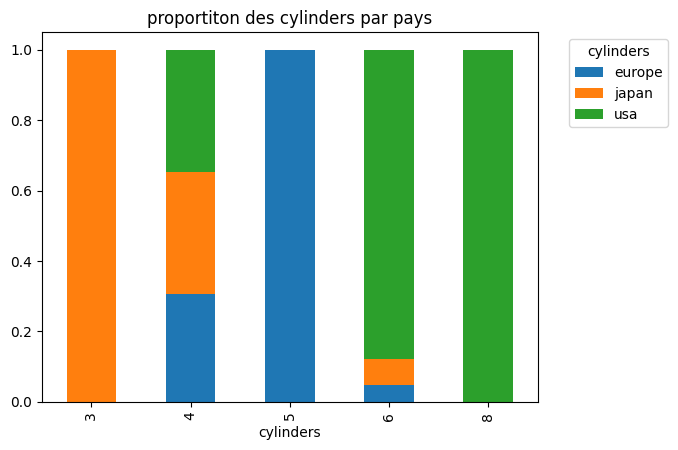

In [ ]:
crosstab1= pd.crosstab(df["cylinders"],df["origin"],normalize="index").plot(kind="bar",stacked=True)
plt.legend(title="cylinders" , bbox_to_anchor=(1.05,1) ,loc="upper left")
plt.title("proportiton des cylinders par pays")

8. Analysez la relation entre le nombre de cylindres et l'origine.
- Se dégage-t'il quelque chose de cette analyse ?

<Axes: xlabel='origin', ylabel='cylinders'>

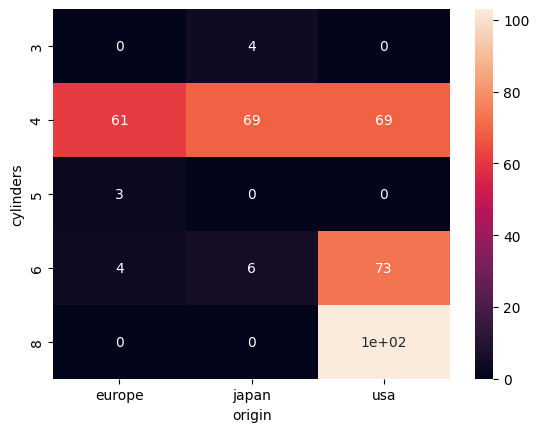

In [ ]:
#nombre de cylindre et origine (discret discret)
crosstab1= pd.crosstab(df["cylinders"],df["origin"])
sns.heatmap(crosstab1, annot=True)

9. Quelle est l'accélération moyenne des voitures des différents pays ?

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

origin
europe    16.79
japan     16.17
usa       14.99
Name: acceleration, dtype: float64

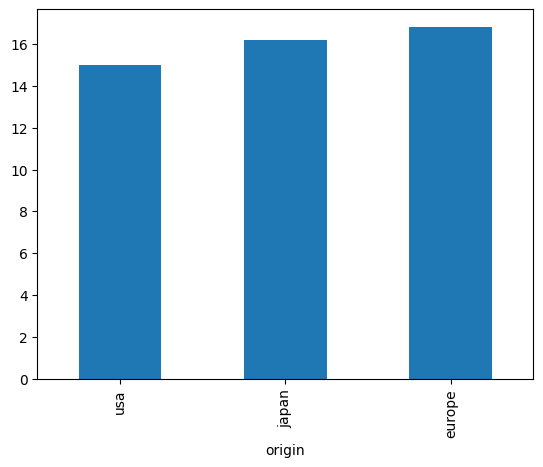

In [ ]:
df.groupby("origin")["acceleration"].mean().sort_values().plot(kind='bar')
df.groupby("origin")["acceleration"].mean().round(2)

10. Quelle est-elle pour les modèles de l'année 80 ?


origin
europe    18.50
japan     16.02
usa       17.22
Name: acceleration, dtype: float64

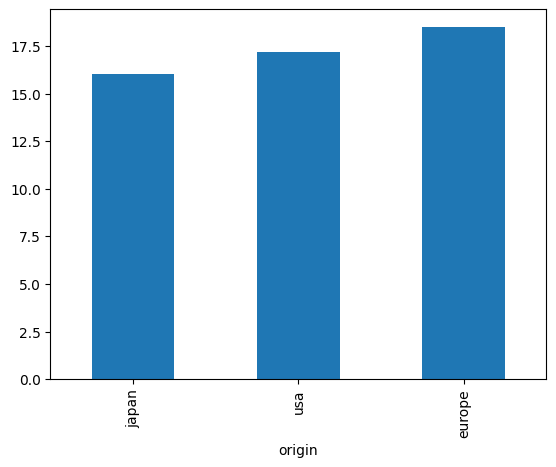

In [ ]:
df.query("model_year == 80").groupby("origin")["acceleration"].mean().sort_values().plot(kind='bar')
df.query("model_year == 80").groupby("origin")["acceleration"].mean().round(2)

11. Au final Il semblerait qu'une tendance se dégage à travers le temps...
- faites la liste de tous les phénomènes qui semblent se produire (diminution ? augmentation ?) pour les différentes variables et groupes